In [ ]:
import pandas as pd

df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df_status_completed = df[df['Order Status'] == 'Completed'].copy()
df_results = pd.DataFrame()
for customer_id, group in df.groupby('Customer ID'):
    payment_method = sorted(group['Payment Method'].mode())[0]
    customer_status_completed = df_status_completed[df_status_completed['Customer ID'] == customer_id]
    total_expenses = customer_status_completed['Total Price'].sum()
    additional_expenses = customer_status_completed['Add-on Total'].sum()
    df_temp = pd.DataFrame({
        'Customer ID': [customer_id],
        'Preferred method': [payment_method],
        'Total expenses': [total_expenses],
        'Add-on expenses': [additional_expenses]
    })
    df_results = pd.concat([df_results, df_temp], ignore_index=True)

df_results = df_results.sort_values('Customer ID').reset_index(drop=True)
print(df_results)

По методу доставки:
Shipping Type
Standard     14387037.62
Expedited     8430385.58
Same Day      8292376.50
Overnight     5887722.52
Express       5632093.35
Name: Total Price, dtype: float64

По типам продуктов
Product Type
Smartphone    14407835.84
Smartwatch     9398591.23
Laptop         8365905.25
Tablet         7722632.25
Headphones     2734651.00
Name: Total Price, dtype: float64

Доп. услуги по месяцам
Month
2023-09     5337.61
2023-10    26153.21
2023-11    24453.33
2023-12    22750.23
2024-01    93254.95
2024-02    80253.72
2024-03    84713.93
2024-04    82294.06
2024-05    89374.18
2024-06    84648.60
2024-07    88811.55
2024-08    87861.11
2024-09    65688.76
Freq: M, Name: Add-on Total, dtype: float64

Доп. услуги по кварталам
Quarter
2023Q3      5337.61
2023Q4     73356.77
2024Q1    258222.60
2024Q2    256316.84
2024Q3    242361.42
Freq: Q-DEC, Name: Add-on Total, dtype: float64


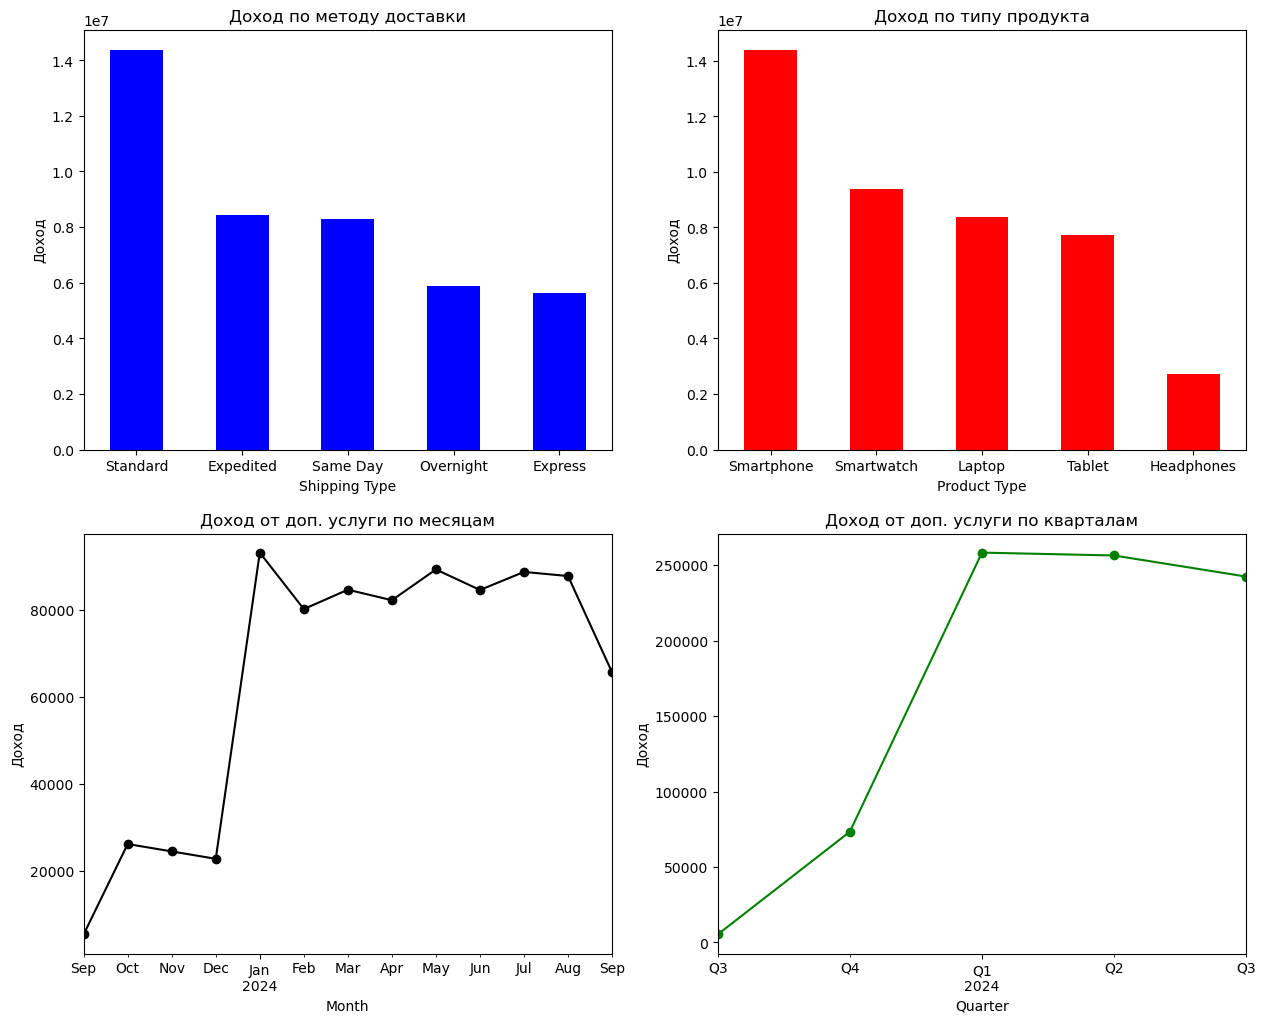

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df_status_completed['Purchase Date'] = pd.to_datetime(df_status_completed['Purchase Date'])
income_delivery = df_status_completed.groupby('Shipping Type')['Total Price'].sum().sort_values(ascending=False)
income_product = df_status_completed.groupby('Product Type')['Total Price'].sum().sort_values(ascending=False)
df_status_completed['Month'] = df_status_completed['Purchase Date'].dt.to_period('M')
df_status_completed['Quarter'] = df_status_completed['Purchase Date'].dt.to_period('Q')
income_additional_monthly = df_status_completed.groupby('Month')['Add-on Total'].sum()
income_additional_quarterly = df_status_completed.groupby('Quarter')['Add-on Total'].sum()
print("По методу доставки:")
print(income_delivery)
print("\nПо типам продуктов")
print(income_product)
print("\nДоп. услуги по месяцам")
print(income_additional_monthly)
print("\nДоп. услуги по кварталам")
print(income_additional_quarterly)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
income_delivery.plot(kind = 'bar', ax=axes[0,0], color='blue')
axes[0,0].set_title('Доход по методу доставки')
axes[0,0].set_ylabel('Доход')
axes[0,0].tick_params(axis='x', rotation=0)

income_product.plot(kind = 'bar', ax=axes[0,1], color='red')
axes[0,1].set_title('Доход по типу продукта')
axes[0,1].set_ylabel('Доход')
axes[0,1].tick_params(axis='x', rotation=0)

income_additional_monthly.plot(kind = 'line', ax=axes[1,0], color='black', marker='o')
axes[1,0].set_title('Доход от доп. услуги по месяцам')
axes[1,0].set_ylabel('Доход')
axes[1,0].tick_params(axis='x', rotation=0)

income_additional_quarterly.plot(kind = 'line', ax=axes[1,1], color='green', marker='o')
axes[1,1].set_title('Доход от доп. услуги по кварталам')
axes[1,1].set_ylabel('Доход')
axes[1,1].tick_params(axis='x', rotation=0)